# The Emerging Popularity of A24 Films

## Introduction

Watching movies is a fun activity that can be done at your local movie theater or pretty much anywhere nowadays, with online streaming services such as Netflix and Hulu. The global film industry is worth tens of billions of dollars and is still growing every year. With the industry increasing so much in the past decade, the competition for people's attention is getting more fierce than ever. Many names come up when people talk about thier favorite studios such as Pixar, Disney, Sony, and Universal Pictures. However, one film studio, **A24**, seems to be joining that conversation in recent years.

A24 is a small company founded in 2012 by Daniel Katz, David Fenkel and John Hodges in New York City. Although the company is relatively young, they have been a contributor to the release of some highly acclaimed movies such as Moonlight and Ex Machina, which won Academy Awards for Best Picture and Best Visual Effects, respectively. While some smaller studios have focused on producing movies for a specific genre or medium such as Blumhouse for horror or Studio Ghibli for animation, A24 has been distributing movies in an assortment of genres spanning from rom-com coming-of-age stories to a mockumentary about a talking sea shell that can walk. A24 established a divison dedicated for televison in 2015. Their TV shows aren't as nearly talked about online as their movies but that may change as their popularity expands and they secure more deals with larger companies. This exploratory data analysis, however, will only focus on their released movies up to August 2022.

![A24 Logo](Images\A24_Logo.png)

## Gathering the Data

With A24 only recently celebrating their 10th anniversary in August of 2022, their film catalogue is small when compared to major film studios such as Paramount Pictures, Universal Pictures and Columbia Pictures. Considering this, I chose to just manually collect information for all the movies listed on [A24's site](https://a24films.com/films) that had been released up to end of August 2022. The information gathered was the movie title, release date, director(s), genre(s), production budget, box office revenue (domestic, international, and worldwide), movie runtime, and their MPAA rating.

Due to some of the movies being released very recently and/or some movies not being officially released in the US, I had difficulties collecting all the data for every movie. Movie budgets were surprisingly the hardest information to find and were usually only estimates at best. It also didn't help that some of the revenue, budget, and even runtime information was varied based on the source I found. To combat this I tried to use only one or two sources for getting information for specific fields. I got the movie title, release date, and director inforamtion from A24's website. Budgets, revenues, runtimes, and MPAA ratings were found from [Box Office Mojo](https://www.boxofficemojo.com/). The data for each of the revenues has been updated up to **9/26/2022**. Lastly, the genre(s) of each film aren't specifically defined so I chose up to four different genres based on the Wikipedia summary of each movie. I put all the data I could find into an Excel spreadsheet table and prepared for the next step of cleaning.

## Cleaning the Data

The data wasn't as complete as I had hoped to find with there being a decent amount of empty values in the some of the columns especially for the budget. I decided to keep the rows with this null data as I believe it might provide some insights on the availability of movie data online. I also considered proxying some of the data but decided against it as I saw from my data that movies can vary greatly on their budgets and box office performance even if other characteristics such as genres, directors, and even runtime are similar. Other inital concerns were about having multiple string values in the genre and director columns. The following steps were performed to clean up and re-format the data:

1. Remove any text values in the budget, domestic revenue, international revenue, and worldwide revenue columns such as "N/A"
2. Change any 0 values in the budget, domestic revenue, international revenue, and worldwide revenue columns to null values
3. Removed any duplicate values in the title column
4. Converted release date column to date type

## Adding Oscar Wins to Dataset

I knew that some of the films that A24 had either distributed or produced had won an Academy Award (same thing as an Oscar) but I wasn't sure how many in total had won. I decided to scrape the movie titles from the [list of Academy Award winners](https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films) Wikipedia page. I then join the original A24 released movies table with the Academy Award winners table with PostgreSQL and create an additonal column called oscar_win that had boolean values of "YES"" if the A24 movie title was in the Academy Awards table and "NO" if otherwise. When I ran this query I noticed a few things:

- Only 6 movies out of all 118 movies had won an oscar
- 5 of the 6 movies had a worldwide revenue of at least **\$12,000,000**
- The outlier movie, **Skin**, had a worldwide revenue of only **\$135,562**

Upon further research, I discovered that the Skin movie in the Academy Award winners table was actually for a short film, surprisingly with the same name, released in the same year, and directed by the same person, Guy Nattiv. I adjusted my SQL query to not catch this movie as having won an Academy Award and then exported the results table as a CSV. The query is shown below:

```SQL
SELECT title, release_date, genre, director, budget, domestic_revenue,
international_revenue, worldwide_revenue, runtime, mpaa_rating,
CASE WHEN film IS NOT NULL AND film <> 'Skin' THEN 'YES' ELSE 'NO' END AS oscar_win
FROM (
	SELECT * 
	FROM a24_released_movies arm 
	LEFT JOIN academy_award_winners aaw
		ON arm.title = aaw.film 
	) AS a24_oscars	
ORDER BY title;
```


## Data Overview

Importing libraries and reading CSV file to dataframe

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter,FuncFormatter

cwd = os.getcwd()

rel_path = "A24 Oscars\\a24_released_movies_and_oscars.csv"

file_path = os.path.join(cwd, rel_path)

A24 = pd.read_csv(file_path)

First 5 rows of the dataset

In [5]:
A24.head()

,title,release_date,genre,director,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime,mpaa_rating,oscar_win
0,20th Century Women,2016-12-28,"Comedy, Drama",Mike Mills,7000000.0,5664764.0,1550042.0,7214806.0,119,R,NO
1,A Ghost Story,2017-07-07,"Drama, Fantasy",David Lowery,100000.0,1596371.0,355312.0,1951683.0,92,R,NO
2,A Glimpse Inside the Mind of Charles Swan III,2013-02-08,Comedy,Roman Coppola,NaN,45350.0,165215.0,210565.0,86,R,NO
3,A Most Violent Year,2014-12-31,"Crime, Drama",J.C. Chandor,20000000.0,5749134.0,6257936.0,12007070.0,125,R,NO
4,A Prayer Before Dawn,2018-08-10,"Action, Drama, Crime",Jean-Stéphane Sauvaire,NaN,14453.0,944430.0,958883.0,116,R,NO


Last 5 rows of the dataset

In [6]:
A24.tail()

,title,release_date,genre,director,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime,mpaa_rating,oscar_win
113,While We're Young,2015-03-27,"Comedy, Drama",Noah Baumbach,10000000.0,7587485.0,10530354.0,18117839.0,97,R,NO
114,Woman Walks Ahead,2018-06-27,"Drama, Biographical, Western",Susanna White,5000000.0,57528.0,23384.0,80912.0,101,R,NO
115,Woodshock,2017-09-22,"Thriller, Drama, Psychological","Kate Mulleavy, Laura Mulleavy",5000000.0,42603.0,1079.0,43682.0,100,R,NO
116,X,2022-03-18,"Horror, Slasher",Ti West,1000000.0,11765309.0,2711286.0,14476595.0,105,R,NO
117,Zola,2021-06-30,"Comedy, Drama, Crime",Janicza Bravo,5000000.0,4844399.0,153698.0,4998097.0,86,R,NO


Overall summary of the dataframe

In [7]:
A24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  118 non-null    object 
 1   release_date           118 non-null    object 
 2   genre                  118 non-null    object 
 3   director               118 non-null    object 
 4   budget                 68 non-null     float64
 5   domestic_revenue       96 non-null     float64
 6   international_revenue  101 non-null    float64
 7   worldwide_revenue      109 non-null    float64
 8   runtime                118 non-null    int64  
 9   mpaa_rating            118 non-null    object 
 10  oscar_win              118 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.3+ KB


## Analyzing the Data: Univariate Analysis

### Descriptive Statistics

In [8]:
# Formatting float values in dataframe
pd.options.display.float_format = '{:,.2f}'.format

A24.describe()

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
count,68.00,96.00,101.00,109.00,118.00
mean,"7,805,955.88","6,431,043.16","4,107,330.82","9,469,913.36",103.97
std,"10,078,841.15","11,948,704.03","7,570,208.39","17,574,511.35",15.11
min,"25,000.00","5,711.00",349.00,"7,856.00",82.00
25%,"2,475,000.00","100,533.25","259,229.00","422,746.00",92.25
50%,"5,000,000.00","1,627,580.50","1,021,034.00","2,308,699.00",102.00
75%,"9,700,000.00","6,443,710.00","3,545,961.00","10,954,677.00",111.00
max,"75,000,000.00","69,993,811.00","37,481,671.00","99,241,693.00",163.00


##### Observations
- There's missing values for budget, domestic_revenue, international_revenue, and worldwide_revenue
- The longest movie is almost **2 times** as long as the shortest
- The maximum values for the 3 types of revenues are *significantly greater* than the minimum values and the values for the different percentiles

### Null Values in Budget

#### Median Revenues vs. Availability of Budget Data

In [9]:
# New dataframe for classifying which movies have budget data
A24_budget_1 = A24.copy()

# Adding new column to distinguish which movies have budget data
A24_budget_1['has_budget'] = np.select([A24_budget_1['budget'].isnull(), A24_budget_1['budget'].notnull()], ['NO','YES'], default='')
A24_budget_1_median = A24_budget_1.groupby('has_budget').median()

# New dataframe for all movies with or without budget data
A24_budget_2 = A24.copy()

# Adding new column for grouping by all movies with or without budget data
A24_budget_2['has_budget'] = np.select([A24_budget_2['budget'].any()], ['YES OR NO'], default='')
A24_budget_2_median = A24_budget_2.groupby('has_budget').median()

# Combining the rows of the two data frames together
A24_budgets_median = pd.concat([A24_budget_1_median,A24_budget_2_median], sort = False)

A24_budgets_median # Data of average values for the 3 different movie groups

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
has_budget,,,,,
NO,NaN,"204,052.00","463,629.00","915,844.00",100.50
YES,"5,000,000.00","3,172,167.00","1,627,403.00","4,484,199.00",103.50
YES OR NO,"5,000,000.00","1,627,580.50","1,021,034.00","2,308,699.00",102.00


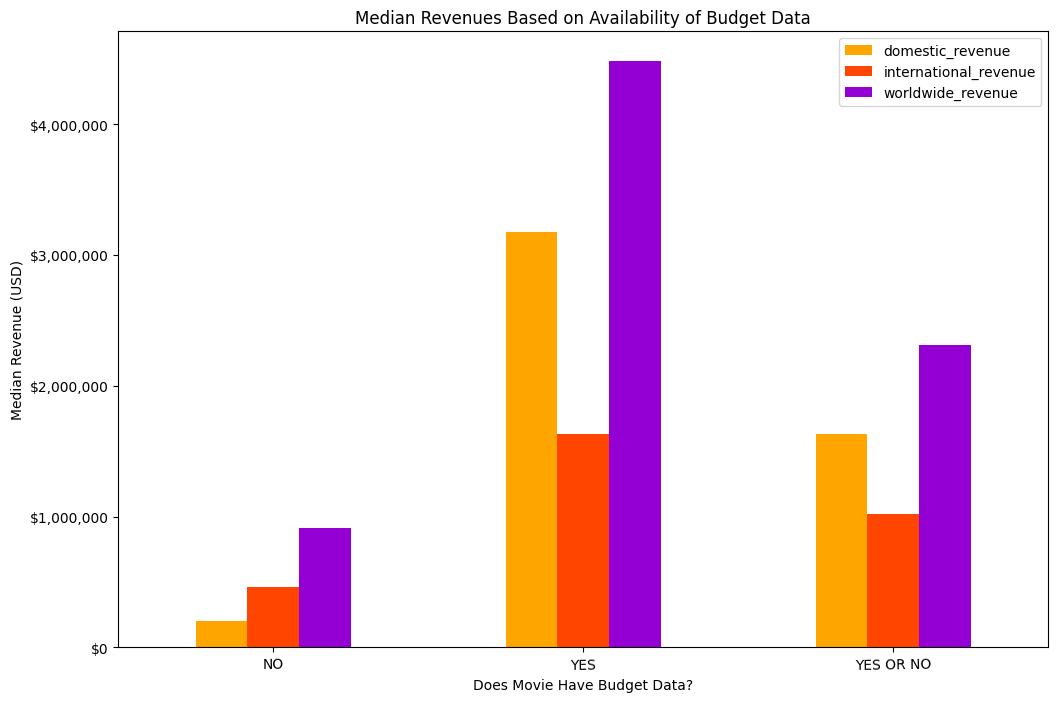

In [10]:
# Creating plot for median revenues vs. availability of budget data
A24_budgets_median_revenues_plot = A24_budgets_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind='bar', figsize = (12,12/1.5), color = ['orange','orangered','darkviolet'], rot = 1,
xlabel='Does Movie Have Budget Data?', ylabel='Median Revenue (USD)',
title='Median Revenues Based on Availability of Budget Data')

A24_budgets_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

A24_budgets_median_revenues_plot;

I decided to use the median revenues instead of the mean revenues because there isn't a lot of data points and the range for all the different revenue types is very large. For example, the range for the worldwide_revenues is **99,233,837** which is very close to the max worldwide_revenue of **99,241,693**.

Now, we can see how the median of the different types of revenue for the "no" budget movies compares to all of the movies and compares to the other movies that have budget data.

In [11]:
# Average revenue ratios between movies without budget data and all movies
median_dr_ratio_1 = A24_budgets_median.loc['NO'] ['domestic_revenue'] / A24_budgets_median.loc['YES OR NO'] ['domestic_revenue']
median_dr_ratio_2 = A24_budgets_median.loc['NO'] ['domestic_revenue'] / A24_budgets_median.loc['YES'] ['domestic_revenue']
median_ir_ratio_1 = A24_budgets_median.loc['NO'] ['international_revenue'] / A24_budgets_median.loc['YES OR NO'] ['international_revenue']
median_ir_ratio_2 = A24_budgets_median.loc['NO'] ['international_revenue'] / A24_budgets_median.loc['YES'] ['international_revenue']
median_wwr_ratio_1 = A24_budgets_median.loc['NO'] ['worldwide_revenue'] / A24_budgets_median.loc['YES OR NO'] ['worldwide_revenue']
median_wwr_ratio_2 = A24_budgets_median.loc['NO'] ['worldwide_revenue'] / A24_budgets_median.loc['YES'] ['worldwide_revenue']

print(median_dr_ratio_1)
print(median_dr_ratio_2)
print(median_ir_ratio_1)
print(median_ir_ratio_2)
print(median_wwr_ratio_1)
print(median_wwr_ratio_2)

0.12537137180004307
0.06432574325374421
0.4540779249270837
0.28488886895255816
0.39669268276202313
0.20423803671514132


##### Observations
- The *median domestic revenue* for movies with no available budget data is about **13%** of the *median domestic revenue* of all the released movies
- The *median domestic revenue* for movies with no available budget data is about **6%** of the *median domestic revenue* of all released movies that had budget data
- The *median international revenue* for movies with no available budget data is about **45%** of the *median international revenue* of all the released movies
- The *median international revenue* for movies with no available budget data is about **28%** of the *median international revenue* of all released movies that had budget data
- The *median worldwide revenue* for movies with no available budget data is about **40%** of the *median worldwide revenue* of all the released movies
- The *median worldwide revenue* for movies with no available budget data is about **20%** of the *median worldwide revenue* of all released movies that had budget data

#### Average Runtime vs. Availability of Budget Data

I decided to use the mean for runtimes instead of the median because most of runtime values are close together and there are very few outliers.

In [12]:
# Calculating mean values and grouping by whether movie has budget data
A24_budget_mean_1 = A24_budget_1.groupby('has_budget').mean()

# Calculating mean values and grouping by has_budget column of dataframe with "YES OR NO" in has_budget column
A24_budget_mean_2 = A24_budget_2.groupby('has_budget').mean()

# Joing rows of the above dataframes 
A24_budgets_mean = pd.concat([A24_budget_mean_1,A24_budget_mean_2], sort = False).sort_values('runtime', ascending = False)

A24_budgets_mean # Data of average values for the 3 different movie groups

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
has_budget,,,,,
YES,"7,805,955.88","9,143,557.15","5,787,024.57","13,902,732.70",106.35
YES OR NO,"7,805,955.88","6,431,043.16","4,107,330.82","9,469,913.36",103.97
NO,NaN,"1,484,694.12","1,322,575.39","2,398,511.07",100.72


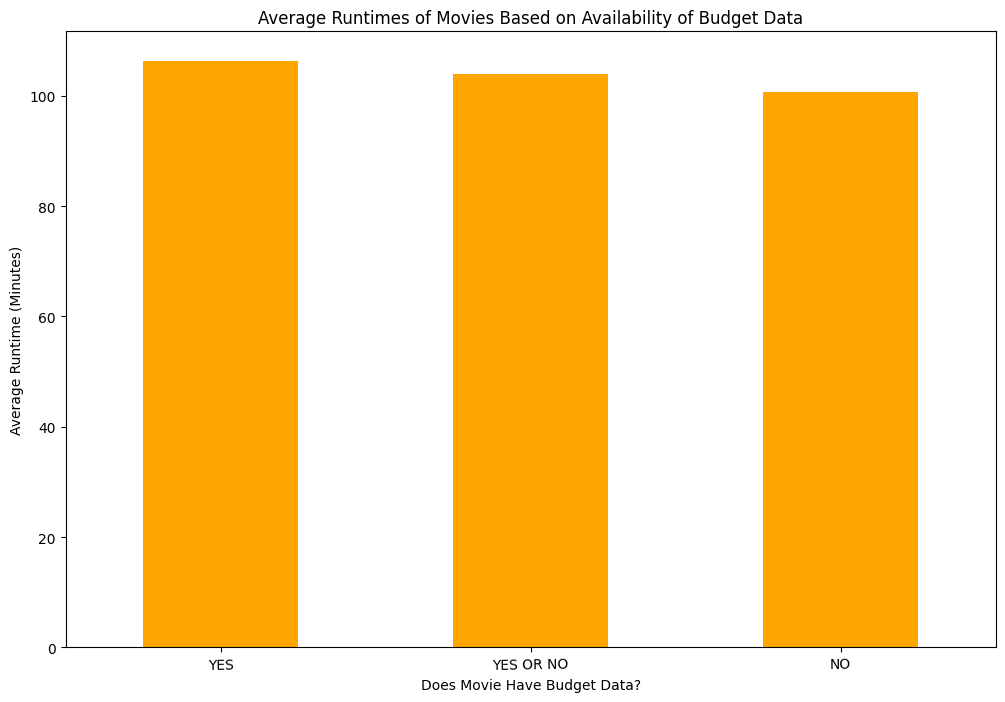

In [13]:
A24_budgets_mean_runtime_plot = A24_budgets_mean[['runtime']].plot(kind='bar', figsize = (12,12/1.5), color = ['orange'], rot = 1,
xlabel='Does Movie Have Budget Data?', ylabel='Average Runtime (Minutes)',
title='Average Runtimes of Movies Based on Availability of Budget Data')

# Removes plot legend
A24_budgets_mean_runtime_plot.get_legend().remove()

A24_budgets_mean_runtime_plot;

##### Observations
- There *isn't a significant difference* in average runtime between movies with budget data, all movies, and movies with no budget data

### Movie Titles

#### Number of Movies by Word Count in Title

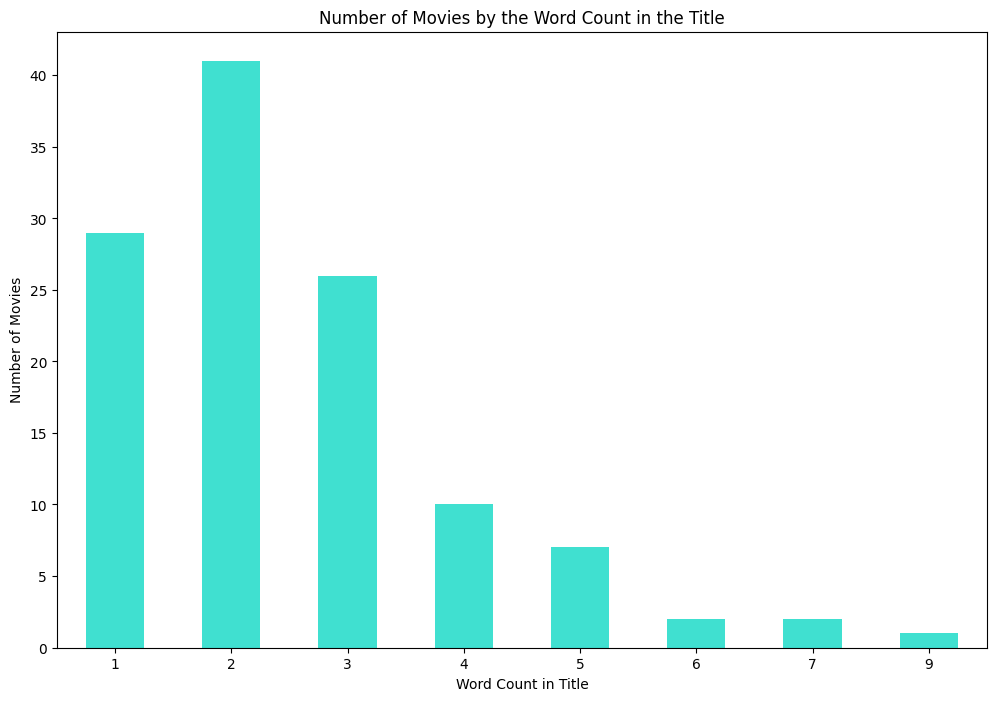

In [14]:
A24_title_word = A24.copy()

# Calculating word count based on number of spaces in title
A24_title_word['title_word_count'] = A24_title_word.title.str.count(" ") + 1

A24_title_word_count= A24_title_word.groupby('title_word_count').count()

A24_title_word_count_plot = A24_title_word_count['title'].plot(kind = 'bar', figsize = (12,12/1.5), color = ['turquoise'], rot = 1,
xlabel='Word Count in Title', ylabel='Number of Movies',
title='Number of Movies by the Word Count in the Title')

##### Observations
- The majority of movies have between **1** and **3** words in the title

#### Median Revenues vs. Median Word Count in Title

In [15]:
# Calculating median word count in title
A24_title_word['title_word_count'].median()

2.0

In [16]:
# Creating column values for the movies based on if their title word count is "LESS THAN", "EQUAL TO", or "GREATER THAN" the median title word count
A24_title_word['median_word_count'] = np.select([A24_title_word['title_word_count'] < A24_title_word['title_word_count'].median(),
A24_title_word['title_word_count'] == A24_title_word['title_word_count'].median(), A24_title_word['title_word_count'] > A24_title_word['title_word_count'].median()], ['LESS THAN', 'EQUAL TO', 'GREATER THAN'], default='NO')

# Calculating median values and grouping by median word count distinction
A24_title_word_median = A24_title_word.groupby('median_word_count').median().drop(['budget','runtime'], axis = 1).sort_values('title_word_count', ascending = True)

A24_title_word_median

,domestic_revenue,international_revenue,worldwide_revenue,title_word_count
median_word_count,,,,
LESS THAN,"1,764,870.50","1,940,583.00","3,328,655.50",1.00
EQUAL TO,"1,799,312.00","1,066,480.00","2,308,699.00",2.00
GREATER THAN,"1,012,973.00","661,803.00","1,333,439.50",3.00


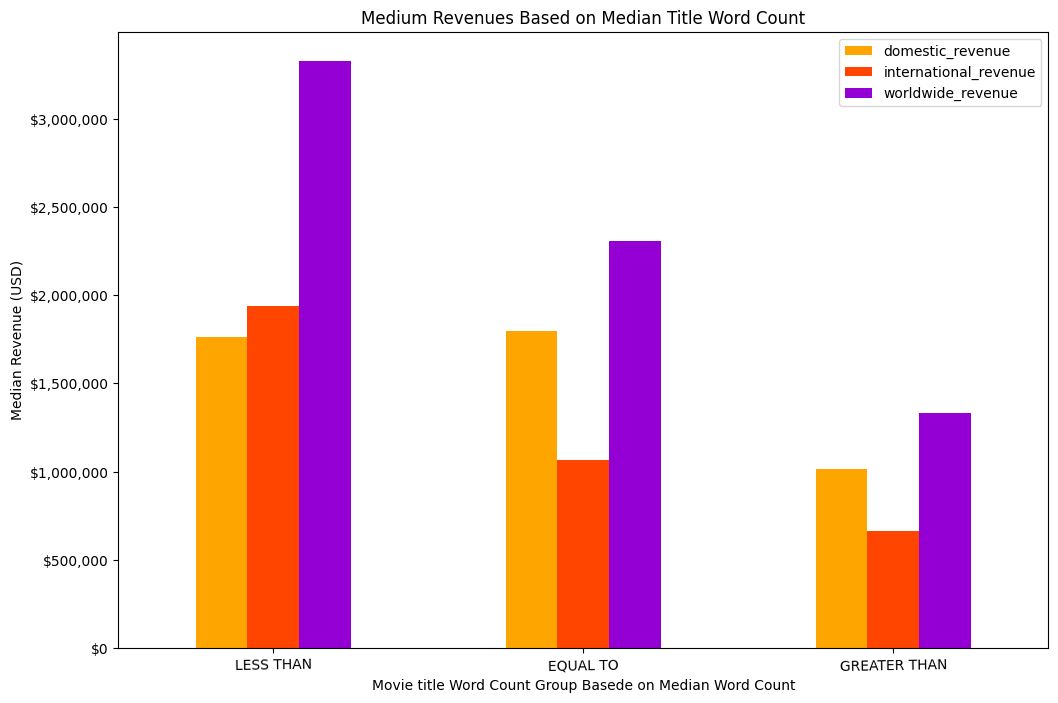

In [17]:
A24_title_word_median_plot = A24_title_word_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 1,
xlabel='Movie title Word Count Group Basede on Median Word Count', ylabel='Median Revenue (USD)',
title='Medium Revenues Based on Median Title Word Count')

A24_title_word_median_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Movies with a title word count **less than** the median title word count have greater median revenues than other movies with more words in the title

#### Number of Movie Titles that start with "The"

When I was looking through the data, I noticed that a lot of movie titles started with word **"The"**...

In [18]:
A24_title_The = A24.copy()

# Adding column with values based whether the movie title starts with "The "
A24_title_The['starts_with_The'] = np.select([A24_title_The['title'].str.startswith("The ")], ['YES'], default='NO')

A24_title_The_count = A24_title_The.groupby('starts_with_The').count()

A24_title_The_count[['title']]

,title
starts_with_The,
NO,86
YES,32


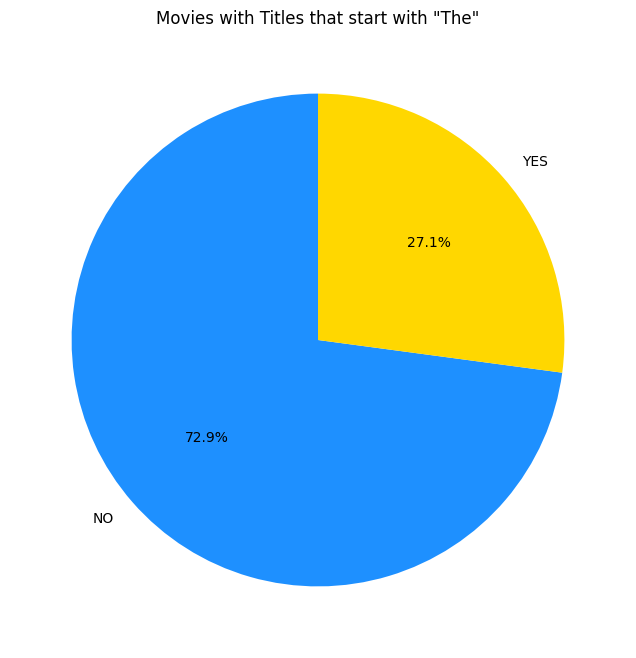

In [19]:
A24_title_The_count_plot = A24_title_The_count.plot(kind ='pie', y = 'title', ylabel = "", title = 'Movies with Titles that start with "The"', colors = ['dodgerblue','gold'], figsize = (12,12/1.5), autopct='%.1f%%', startangle = 90)

A24_title_The_count_plot.get_legend().remove()

##### Observations
- Movies with titles that start with the word "The" make up over **27%** of all the movies

#### Median Revenues vs. Whether Movie Title Starts with "The"

In [20]:
A24_title_The_median_revenues = A24_title_The.groupby('starts_with_The').median()

A24_title_The_median_revenues

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
starts_with_The,,,,,
NO,"5,000,000.00","1,658,790.00","1,142,592.50","2,308,699.00",100.50
YES,"6,000,000.00","1,114,423.00","886,551.00","2,363,045.00",105.00


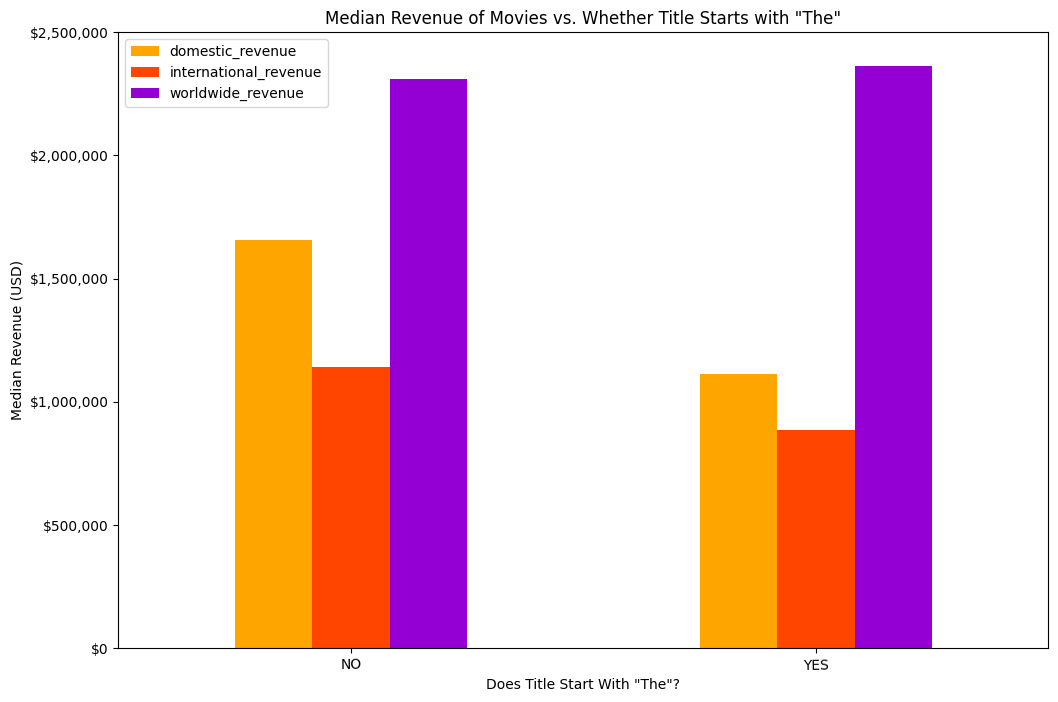

In [21]:
A24_title_The_median_revenues_plot = A24_title_The_median_revenues[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 1,
xlabel='Does Title Start With "The"?', ylabel='Median Revenue (USD)',
title='Median Revenue of Movies vs. Whether Title Starts with "The"',ylim = (0,2500000))

A24_title_The_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

In [22]:
# Calculating the ration between the median domestic revenue for movie titles that did start with the word "The" and movies that didn't
A24_title_The_median_revenues['domestic_revenue'].loc['NO'] / A24_title_The_median_revenues['domestic_revenue'].loc['YES']

1.4884743046401592

In [23]:
# Calculating the ration between the median domestic revenue for movie titles that did start with the word "The" and movies that didn't
A24_title_The_median_revenues['international_revenue'].loc['NO'] / A24_title_The_median_revenues['international_revenue'].loc['YES']

1.2888062841280423

##### Observations
- There *isn't a significant difference* between the median worldwide revenue for movies with titles that started with the word **"The"** and movies that didn't
- The median domestic revenue for movies with titles that *didn't* start with the word **"The"** is about **49%** greater than movies with titles that did
- The median international revenue for movies with titles that *didn't* start with the word **"The"** is about **29%** greater than movies with titles that did


### Release Dates

#### Number of Movies by Release Year

In [24]:
A24_date = A24.copy()

# Converting release date column values to datetime values
A24_date['date'] = pd.to_datetime(A24_date['release_date'])

# Adding columns for release year and release month by name
A24_date['release_year'] = A24_date['date'].dt.year

# Counting movies and grouping by release year
A24_date_year_count = A24_date.groupby('release_year').count()

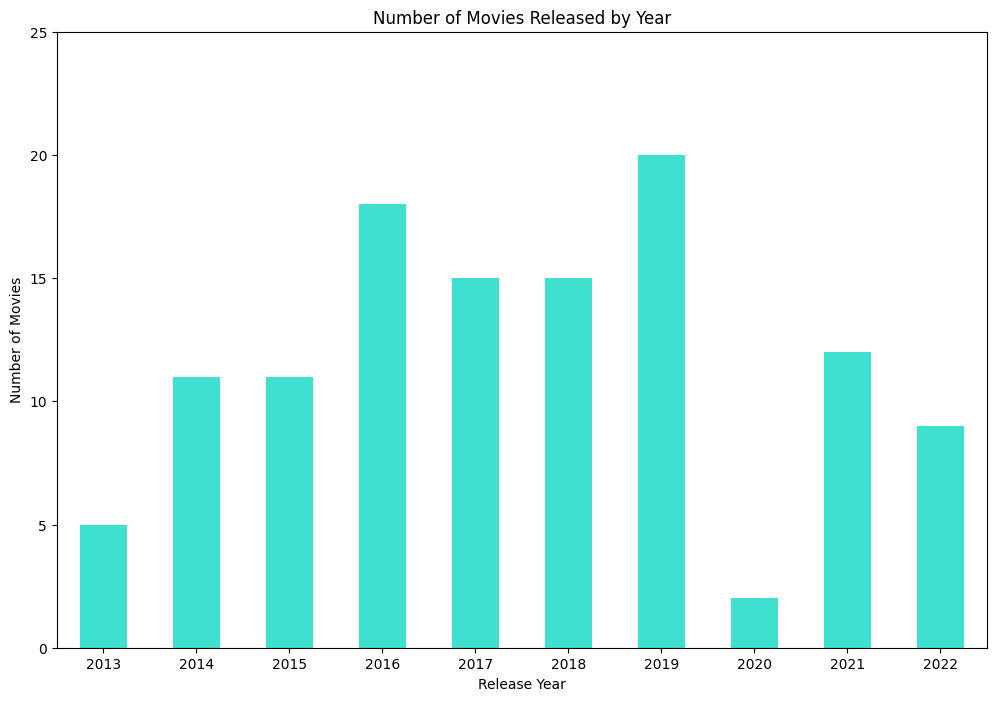

In [25]:
A24_date_year_count_plot = A24_date_year_count[['title']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['turquoise'], rot = 0,
xlabel='Release Year', ylabel='Number of Movies',
title='Number of Movies Released by Year', ylim = [0,25])

A24_date_year_count_plot.yaxis.set_major_formatter('{x:.0f}')
A24_date_year_count_plot.get_legend().remove()

##### Observations
- The number of movies released seemed to increased steadily from **2013** to **2019** and it dropped significantly in **2020**
- After **2020**, the number of released movies returned back to the norm with a slight decrease

#### Median Revenue by Release Year

In [26]:
A24_date_year_median = A24_date.groupby('release_year').median()
A24_date_year_median

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
release_year,,,,,
2013,"5,000,000.00","5,845,732.00","661,803.00","6,918,591.00",90.00
2014,"5,000,000.00","1,245,096.00","1,312,173.00","2,510,007.00",99.00
2015,"11,000,000.00","3,002,884.00","1,066,480.00","3,072,991.00",108.00
2016,"4,000,000.00","204,052.00","1,060,901.50","1,781,373.50",99.00
2017,"5,000,000.00","1,799,312.00","884,178.00","2,216,083.00",99.00
2018,"5,000,000.00","547,750.00","807,724.00","958,883.00",105.00
2019,"6,000,000.00","1,479,955.50","918,200.00","2,093,251.00",110.00
2020,NaN,"101,068.00","1,138,822.00","1,189,356.00",109.00
2021,"3,700,000.00","2,676,410.00","905,192.00","2,748,893.00",107.50


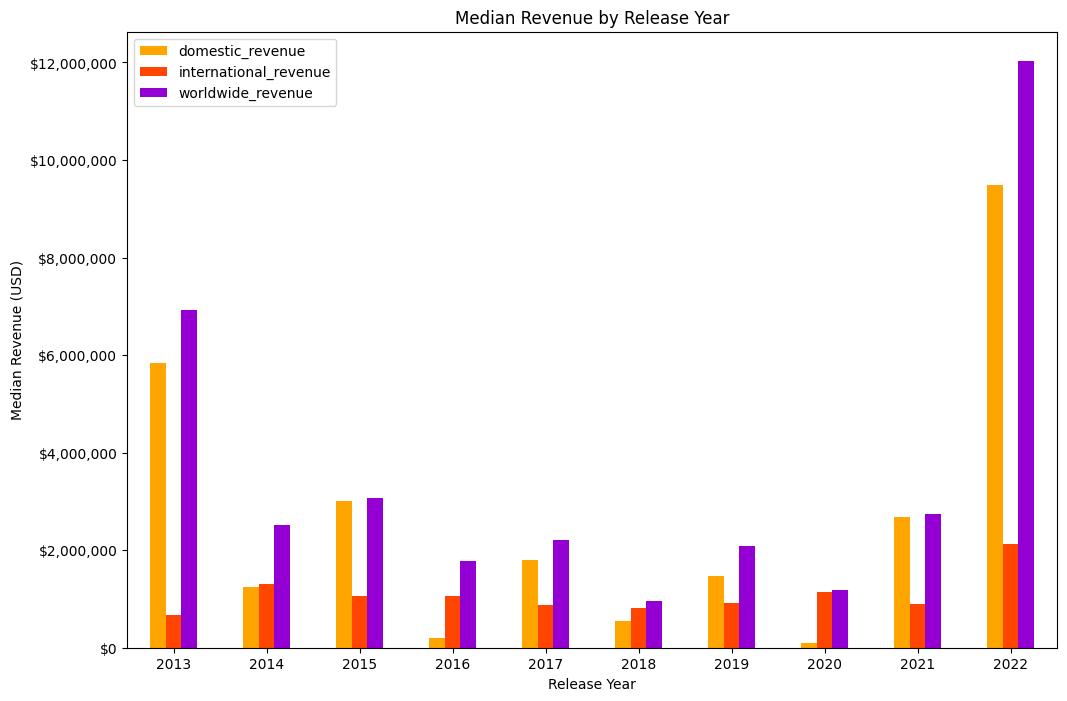

In [27]:
A24_date_year_median_revenues_plot = A24_date_year_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 0,
xlabel='Release Year', ylabel='Median Revenue (USD)',
title='Median Revenue by Release Year')

A24_date_year_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- The first year of production **2013** was good for domestic and worldwide revenue
- Worldwide revenue slowly declined from the first production year **2013**
- **2022** was the best year for the all of the 3 types of revenues
- International revenue stayed relatively the same through the years which means that domestic revenue makes up a significant percentage of the total revenue for the movies

#### Total Revenue by Release Year

In [28]:
A24_date_year_sum = A24_date.groupby('release_year').sum().drop(['runtime'], axis = 1)

A24_date_year_sum

,budget,domestic_revenue,international_revenue,worldwide_revenue
release_year,,,,
2013,"15,700,000.00","27,882,950.00","33,136,957.00","61,019,907.00"
2014,"60,200,000.00","19,043,403.00","19,963,881.00","39,007,284.00"
2015,"104,250,000.00","59,698,423.00","66,188,644.00","125,887,067.00"
2016,"65,630,000.00","77,756,043.00","71,024,772.00","148,780,815.00"
2017,"49,100,000.00","102,365,590.00","58,771,532.00","161,137,122.00"
2018,"38,200,000.00","70,363,137.00","59,605,472.00","129,968,609.00"
2019,"137,925,000.00","122,283,718.00","48,814,749.00","171,098,467.00"
2020,0.00,"101,068.00","2,277,644.00","2,378,712.00"
2021,"33,800,000.00","30,790,399.00","17,406,713.00","48,197,112.00"


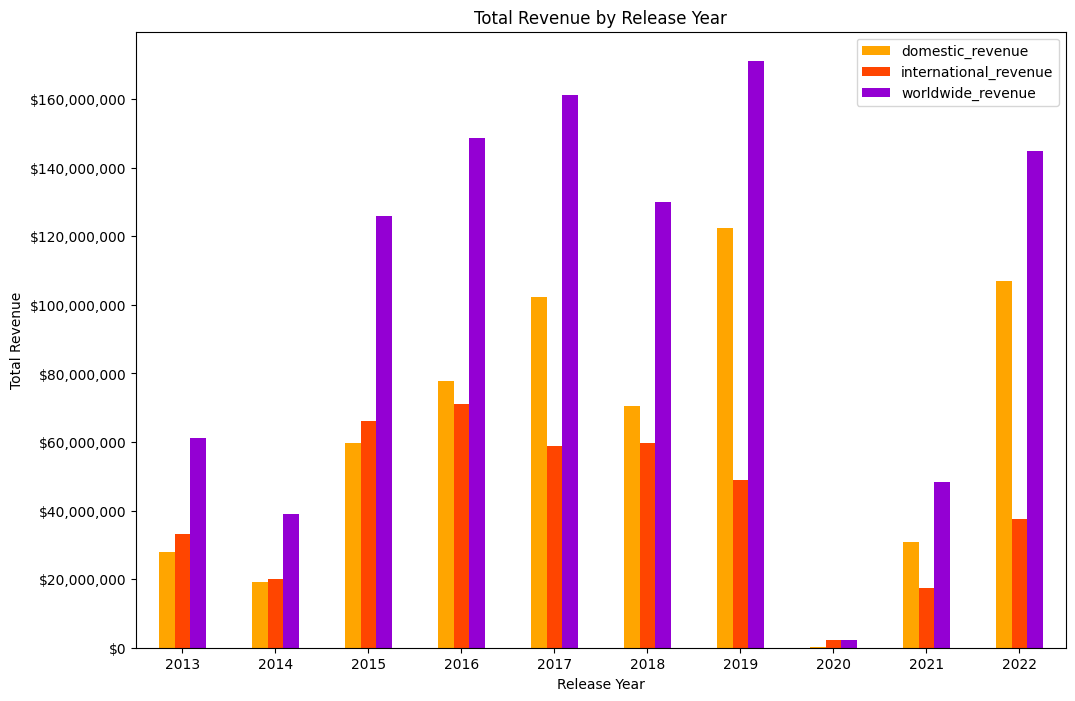

In [29]:
A24_date_year_sum_revenues_plot = A24_date_year_sum[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind = 'bar', figsize = (12,12/1.5),
color = ['orange','orangered','darkviolet'], rot = 0,
xlabel='Release Year', ylabel='Total Revenue',
title='Total Revenue by Release Year')

A24_date_year_sum_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Total revenue rapidly increased from **2014** to **2019** but dropped significantly in **2020**
- After **2020**, total revenue increased largely to return almost right back to revenue totals from the years before **2020**

### Movie Genres

#### Number of Movies Per Movie Genre

In [41]:
A24_genre = A24.copy()

A24_genre['genre'].unique()

A24_genre['main_genre'] = A24_genre['genre'].apply(lambda x: x.split(',')[0])

A24_genre[['main_genre']].value_counts()

main_genre 
Drama          38
Comedy         20
Horror         20
Crime           9
Thriller        7
Sci-Fi          6
Documentary     5
Action          3
Mystery         3
Romance         3
Western         3
Adventure       1
dtype: int64

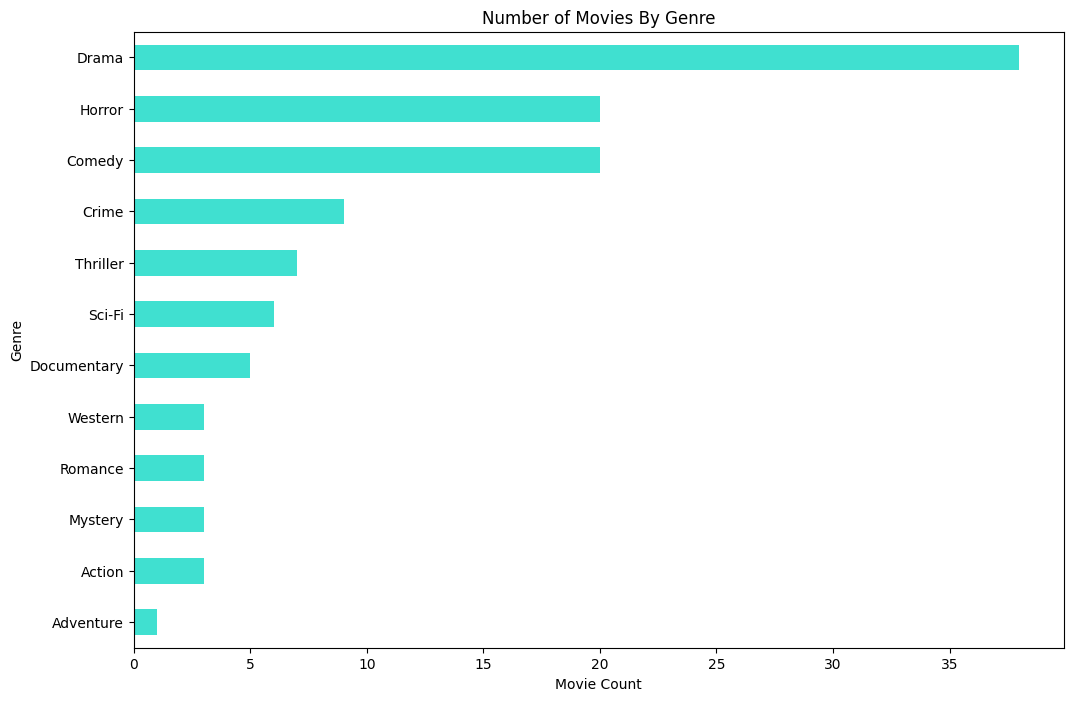

In [58]:
A24_genre_count = A24_genre.groupby('main_genre').count().sort_values('title', ascending = True)

A24_genre_count_plot = A24_genre_count[['title']].plot(kind ='barh', title = "Number of Movies By Genre", color = ['turquoise'], figsize = (12,12/1.5))
plt.xlabel('Movie Count')
plt.ylabel('Genre')

A24_genre_count_plot.get_legend().remove()

##### Observations
- The top 5 genres are **Drama**, **Horror**, **Comedy**, **Crime**, and **Thriller**
- There are almost twice as many movies of the genre **Drama** than there are of the 2nd most common genres **Horror** and **Comedy**

#### Median Revenues vs. Top 5 Movie Genres

In [ ]:
A24_genre_median = A24_genre.groupby('main_genre').median()

A24_genre_median = A24_genre_median.loc[['Drama','Horror','Comedy','Crime','Thriller']]

A24_genre_median

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
main_genre,,,,,
Drama,"3,000,000.00","1,242,842.50","813,650.00","1,962,265.00",104.00
Horror,"5,000,000.00","5,404,112.00","2,120,261.00","5,398,275.00",96.00
Comedy,"5,000,000.00","5,254,581.50","1,138,858.00","4,998,097.00",95.00
Crime,"10,100,000.00","5,749,134.00","585,863.50","660,241.00",102.00
Thriller,"5,000,000.00","525,664.50","367,000.00","367,000.00",100.00


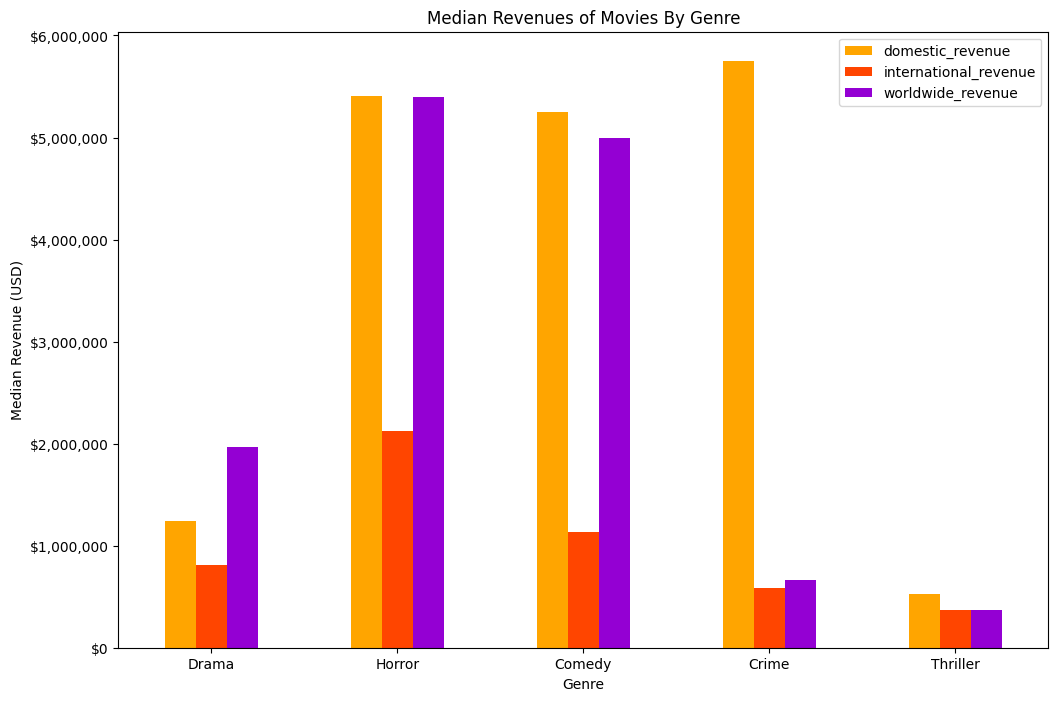

In [ ]:
A24_genre_median_revenues_plot = A24_genre_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind ='bar', xlabel = "Genre", ylabel = "Median Revenue (USD)", title = "Median Revenues of Movies By Genre", rot = 0, color = ['orange','orangered','darkviolet'], figsize = (12,12/1.5))

A24_genre_median_revenues_plot.yaxis.set_major_formatter('${x:,.0f}')

##### Observations
- The data is misrepresented due to null values in the domestic revenue of movies in the genres of **Comedy**, **Crime** and **Thriller** with smaller revenues causing the median domestic revenue to be higher than the worldwide revenue

#### Median Budget vs. Movie Genre

In [60]:
A24_genre_mean = A24_genre.groupby('main_genre').mean().sort_values('runtime', ascending = True)
# A24_genre_mean = A24_genre.groupby('main_genre').mean().iloc[-5:].reindex()

A24_genre_mean

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
main_genre,,,,,
Western,"6,750,000.00","450,457.67","1,231,032.00","1,271,145.67",99.33
Comedy,"5,953,333.33","9,411,183.00","4,587,229.06","13,261,653.53",99.60
Thriller,"5,100,000.00","533,690.00","666,046.00","971,011.71",100.29
Action,"11,000,000.00","606,613.33","1,264,091.00","1,870,704.33",101.00
Horror,"11,718,181.82","10,195,094.12","5,825,781.56","14,888,087.44",101.90
Romance,NaN,"2,838,205.67","1,906,425.67","4,744,631.33",102.00
Drama,"5,193,095.24","4,740,270.53","4,791,875.07","8,441,283.11",104.53
Sci-Fi,"14,150,000.00","4,908,000.00","3,096,568.50","8,004,568.50",104.67
Crime,"11,033,333.33","12,730,171.20","2,912,321.75","9,661,047.78",105.78


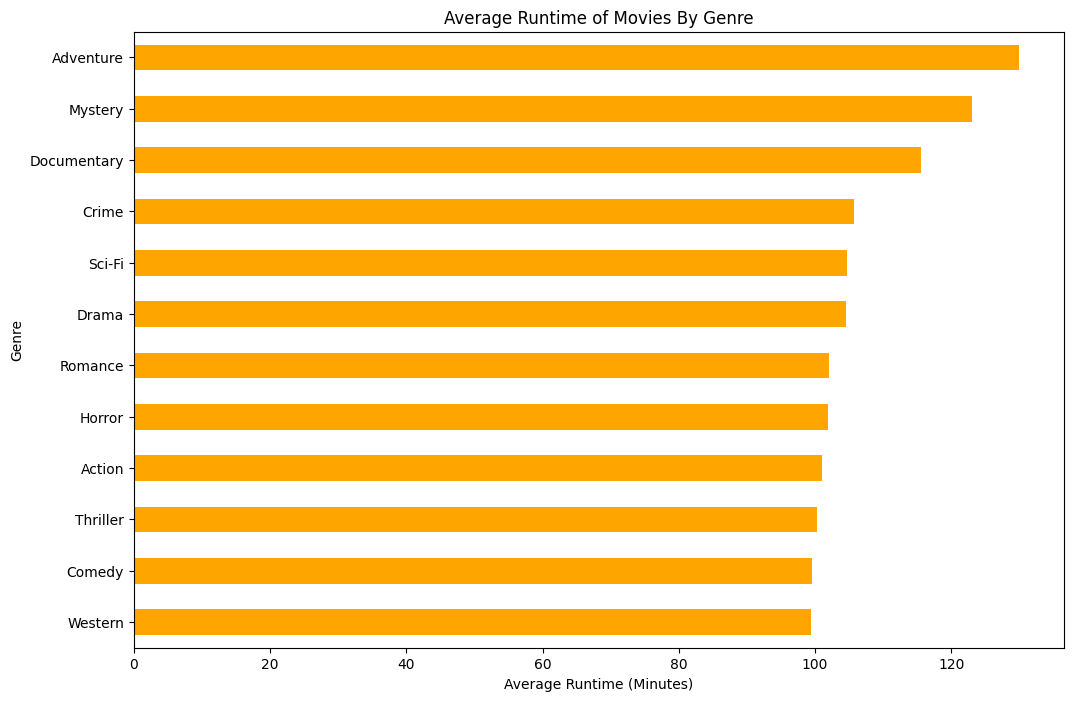

In [62]:
A24_genre_mean_runtime_plot = A24_genre_mean[['runtime']].plot(kind ='barh', title = "Average Runtime of Movies By Genre", rot = 0, color = ['orange'], figsize = (12,12/1.5))
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Genre')

A24_genre_mean_runtime_plot.get_legend().remove()

##### Observations
- The movies with the genre **Adventure** have the longest average runtime
- The data is misrepresented due to the movie count of some genres being very small, such as **Adventure** with only one movie

### Budgets

#### Median Revenues vs. Budget Ranges

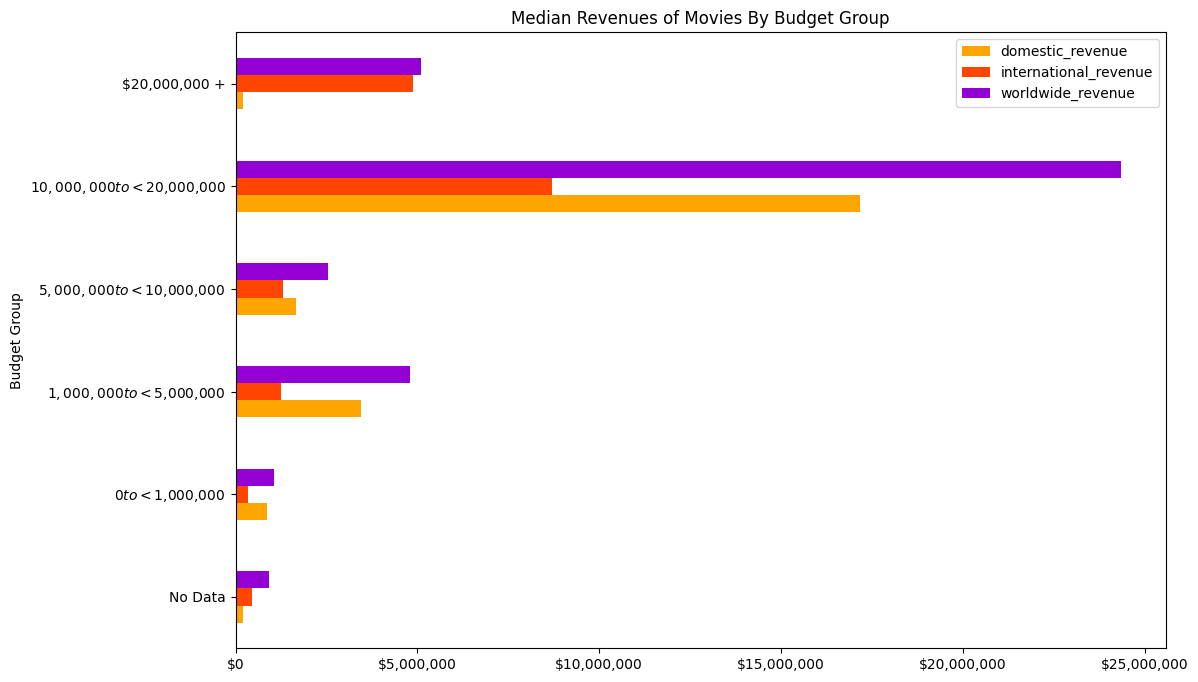

In [65]:
# New dataframe for classifying which movies have budget data
A24_budget_groups = A24.copy()

# Adding new column to distinguish which movies have budget data
A24_budget_groups['budget_range'] = np.select([A24_budget_groups['budget'].isnull(),
(A24_budget_groups['budget'] >= 0) & (A24_budget_groups['budget'] < 1000000), 
(A24_budget_groups['budget'] >= 1000000) & (A24_budget_groups['budget'] < 5000000),
(A24_budget_groups['budget'] >= 5000000) & (A24_budget_groups['budget'] < 10000000),
(A24_budget_groups['budget'] >= 10000000) & (A24_budget_groups['budget'] < 20000000),
(A24_budget_groups['budget'] >= 20000000)],
['No Data','$0 to < $1,000,000','$1,000,000 to < $5,000,000','$5,000,000 to < $10,000,000','$10,000,000 to < $20,000,000','$20,000,000 +'], default='N/A')

budget_order = ['No Data','$0 to < $1,000,000','$1,000,000 to < $5,000,000','$5,000,000 to < $10,000,000','$10,000,000 to < $20,000,000','$20,000,000 +']

A24_budget_groups_median = A24_budget_groups.groupby('budget_range').median().reindex(budget_order)

A24_budget_groups_median
A24_budget_groups_median_revenues_plot = A24_budget_groups_median[['domestic_revenue','international_revenue','worldwide_revenue']].plot(kind ='barh', xlabel = "Budget Group", ylabel = "Median Revenue (USD)", title = "Median Revenues of Movies By Budget Group", color = ['orange','orangered','darkviolet'], figsize = (12,12/1.5))

A24_budget_groups_median_revenues_plot.xaxis.set_major_formatter('${x:,.0f}')

##### Observations
- Movies in the budget group **\$10,000,000 to < \$20,000,000** had the largest median revenues for all 3 types of revenue

#### Average Runtimes vs. Budget Ranges

In [66]:
A24_budget_groups_mean = A24_budget_groups.groupby('budget_range').mean().reindex(budget_order)

A24_budget_groups_mean

,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime
budget_range,,,,,
No Data,NaN,"1,484,694.12","1,322,575.39","2,398,511.07",100.72
"$0 to < $1,000,000","51,666.67","870,596.50","355,312.00","1,048,252.50",88.00
"$1,000,000 to < $5,000,000","2,486,538.46","6,455,155.56","4,472,701.84","10,507,555.19",104.92
"$5,000,000 to < $10,000,000","6,713,636.36","4,486,654.68","3,636,992.81","7,346,513.09",105.86
"$10,000,000 to < $20,000,000","12,775,000.00","22,049,179.36","11,945,982.36","31,162,231.58",111.17
"$20,000,000 +","33,000,000.00","15,198,609.80","8,925,407.00","24,124,016.80",115.40


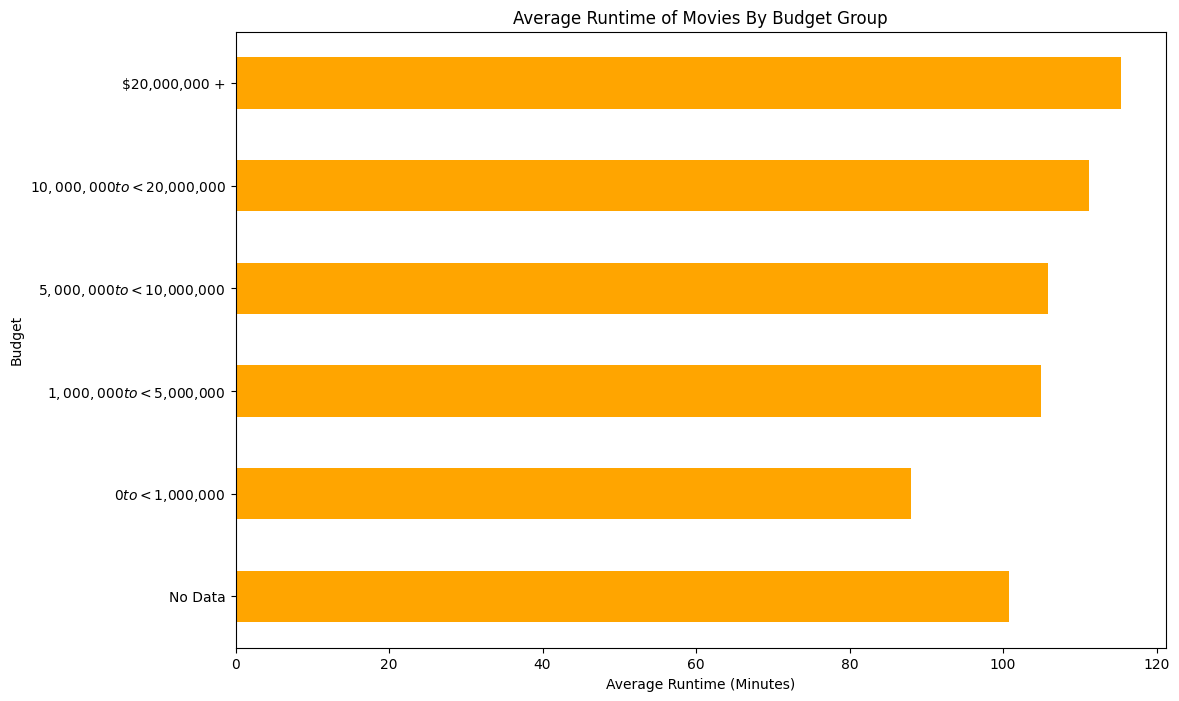

In [68]:
A24_budget_groups_mean_runtime_plot = A24_budget_groups_mean[['runtime']].plot(kind ='barh', xlabel = "Budget Group", ylabel = "Average Runtime (Minutes)", title = "Average Runtime of Movies By Budget Group", color = ['orange'], figsize = (12,12/1.5))
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Budget')

A24_budget_groups_mean_runtime_plot.get_legend().remove()

### Movie Directors

# Conclusions

# Where To Go From Here?